## Step 1: Aggregate Data from Wikipedia, Yahoo Finance and EDGAR

In [63]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

import plotly.offline as py
import plotly.graph_objs as go

import matplotlib.pyplot as plt

import json

p.init_notebook_mode(connected=True)
from IPython.display import Image

In [35]:
url_key_statistics = "https://finance.yahoo.com/quote/TSLA/key-statistics"
url_holders = "https://finance.yahoo.com/quote/TSLA/holders"
url_sustainability = "https://finance.yahoo.com/quote/TSLA/sustainability"
url_SnP_Wiki = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
url_SIC_Range_Wiki = "https://en.wikipedia.org/wiki/Standard_Industrial_Classification"
url_edgar_company_api = "http://datafied.api.edgar-online.com/v2/companies?primarysymbols="
edgar_app_key = "ubkhn2ar6ck4m7fhvhp9gqp2"


In [66]:
response = requests.get(url_sustainability)

In [291]:
# response.text

In [288]:
beautsoup_object = BeautifulSoup(response.text, 'html.parser')
# Tells BeautifulSoup that we'd like to use the 'html' parser

In [290]:
# print(beautsoup_object.prettify())

In [70]:
# beautsoup_object.select(".Fz(36px)") -- alternate way but below is more accurate

In [71]:
beautsoup_object.find_all('div', class_ = "Fz(36px)", attrs={"data-reactid": "20"})[0].text

'61'

In [3]:
def getBeatifulResponse(url):
    """Function that gets the response using the URL"""
    response = requests.get(url)
    beautsoup_object = BeautifulSoup(response.text, 'html.parser')
#     print(beautsoup_object.prettify())
    return beautsoup_object

In [79]:
def getSustainabilityScore(url):
    """Function that calls getBeatifulResponse and then extracts 
    Sustainability score from the response"""
    score = 0
    try:
        bsoupobj = getBeatifulResponse(url)
        score = int(bsoupobj.find_all('div', class_ = "Fz(36px)", attrs={"data-reactid": "20"})[0].text)
    finally:
        return score
    

In [173]:
getSustainabilityScore(url_sustainability)

In [5]:
def getHolders(url):
    """Function that calls getBeatifulResponse and then extracts 
    list of holders from the response"""
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find_all('td', {'class': 'Py(10px) Va(m) Fw(b) W(15%)'})
    holders = []
    try:
        for row in table:
            holder = row.text
            holders.append(holder)
#     except:
#         holders = [None,None]
    finally:
        return holders

In [157]:
getHolders(url_holders)

['25.19%', '59.53%', '79.57%', '1,005']

In [153]:
bsoupobj = getBeatifulResponse("https://finance.yahoo.com/quote/TSLA/holders")
# print(bsoupobj.prettify())
# bsoupobj.find_all(class_ = "Py(10px)")
table = bsoupobj.find_all('td', {'class': 'Py(10px) Va(m) Fw(b) W(15%)'})
holders = []
for row in table:
    print(row)
    holder = row.text
    holders.append(holder)
holders

<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="26">25.19%</td>
<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="30">59.53%</td>
<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="34">79.57%</td>
<td class="Py(10px) Va(m) Fw(b) W(15%)" data-reactid="38">1,005</td>


['25.19%', '59.53%', '79.57%', '1,005']

In [6]:
def getSnPCompanies(url):
    """Function that scrapes the list of S&P 500 companies from Wikipedia"""
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find('table', {'class': 'wikitable sortable'})
    companies = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.','-')
        company_name = row.findAll('td')[1].text
        companies.append([ticker,company_name])
    return companies

In [34]:
def getSICRangeLookup(url):
    """Function that scrapes the range of sic codes and corresponding 
    divisions from Wikipedia to create lookups"""
    bsoupobj = getBeatifulResponse(url)
    table = bsoupobj.find('table', {'class': 'wikitable sortable'})
    range_sic_codes = []
                                    
    for row in table.findAll('tr')[1:]:
        range_sic_code = row.findAll('td')[0].text.replace('\n','')
        division = row.findAll('td')[1].text.replace('\n','')
        range_min = int(range_sic_code[0:4])
        range_max = int(range_sic_code[5:9])
        range_sic_codes.append([division, range_min, range_max])
    
    return(range_sic_codes)

In [38]:
r = getSICRangeLookup(url_SIC_Range_Wiki)


In [198]:
# companies = getSnPCompanies(url_SnP_Wiki)

In [215]:
# companies

In [18]:
bsoupobj = getBeatifulResponse("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
# print(bsoupobj.prettify())
table = bsoupobj.find('table', {'class': 'wikitable sortable'})
tickers = []
company_names = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    company_name = row.findAll('td')[1].text
#     print(ticker)
    tickers.append(ticker)
    company_names.append(company_name)


In [32]:
bsoupobj = getBeatifulResponse("https://en.wikipedia.org/wiki/Standard_Industrial_Classification")
table = bsoupobj.find('table', {'class': 'wikitable sortable'})
range_sic_codes = []
for row in table.findAll('tr')[1:]:
    range_sic_code = row.findAll('td')[0].text.replace('\n','')
    division = row.findAll('td')[1].text.replace('\n','')
    range_min = int(range_sic_code[0:4])
    range_max = int(range_sic_code[5:9])
    range_sic_codes.append([division, range_min, range_max])
    
print(range_sic_codes)

[['Agriculture, Forestry and Fishing', 100, 999], ['Mining', 1000, 1499], ['Construction', 1500, 1799], ['not used', 1800, 1999], ['Manufacturing', 2000, 3999], ['Transportation, Communications, Electric, Gas and Sanitary service', 4000, 4999], ['Wholesale Trade', 5000, 5199], ['Retail Trade', 5200, 5999], ['Finance, Insurance and Real Estate', 6000, 6799], ['Services', 7000, 8999], ['Public Administration', 9100, 9729], ['Nonclassifiable', 9900, 9999]]


In [216]:
# company_names

In [205]:
# companies_info = []
# for company in companies[:10]:
#     url_key_statistics = "https://finance.yahoo.com/quote/" + company[0] + "/key-statistics"
#     url_sustainability = "https://finance.yahoo.com/quote/" + company[0] + "/sustainability"
#     url_holders = "https://finance.yahoo.com/quote/"        + company[0] + "/holders"
#     sustainability = getSustainabilityScore(url_sustainability)
#     holders = getHolders(url_holders)

#     company_stats ={}
#     company_stats['COMPANY'] = company[0]
#     company_stats['SUSTAINABILITY_SCORE'] = sustainability
#     company_stats['HOLDERS'] = holders
    
#     companies_info.append(company_stats)
# #     print (company_stats)
# #     print(companies)
#     if len(companies_info) == 1:
#         print('Scraping data', end="")
#     print('.', end="")
# companies_info

In [345]:
"http://datafied.api.edgar-online.com/v2/companies?primarysymbols=msft&appkey=" + edgar_app_key

# bsoupobj = getBeatifulResponse(url_edgar_company_api+edgar_app_key)

# type(bsoupobj.get('result'))
# print(bsoupobj)
# print(bsoupobj.json)

response = requests.get(url_edgar_company_api+"msft&appkey="+edgar_app_key)
edgar_json = json.loads(response.text)

# print(edgar_json)
print(edgar_json['result']['rows'][0]['values'][-2]['value'])
print(edgar_json['result']['rows'][0]['values'][-1]['value'])

7372
Services-Prepackaged Software


In [7]:
def getIndustry(company_ticker):
    """Function that scrapes the Industry for the company using Edgar API"""

    industry = {}
    try:   
        response = requests.get(url_edgar_company_api + company_ticker + "&appkey=" + edgar_app_key)
        edgar_json = json.loads(response.text)

        industry['SIC_CODE'] = edgar_json['result']['rows'][0]['values'][-2]['value']
        industry['SIC_DESC'] = edgar_json['result']['rows'][0]['values'][-1]['value']
    finally:
        return industry

In [286]:
"http://datafied.api.edgar-online.com/v2/corefinancials/ytd?primarysymbols=MSFT&appkey=ubkhn2ar6ck4m7fhvhp9gqp2"

'http://datafied.api.edgar-online.com/v2/corefinancials/ytd?primarysymbols=MSFT&appkey=ubkhn2ar6ck4m7fhvhp9gqp2'

In [342]:
import json
edgar_json_new = pd.read_json(url_edgar_company_api+edgar_app_key)
edgar_json_new['result']['rows'][0]['values'][-2]['value']

'7372'

In [124]:
def getIndustryDivision(sic_code):
    """Functions looks up the SIC code to provide correpsonding Division"""
#     print(SIC_Range)
    for division in SIC_Range:
        if sic_code >= division[1] and sic_code <= division[2]:
            return division[0]

In [46]:
getIndustryDivision(6021)

[['Agriculture, Forestry and Fishing', 100, 999], ['Mining', 1000, 1499], ['Construction', 1500, 1799], ['not used', 1800, 1999], ['Manufacturing', 2000, 3999], ['Transportation, Communications, Electric, Gas and Sanitary service', 4000, 4999], ['Wholesale Trade', 5000, 5199], ['Retail Trade', 5200, 5999], ['Finance, Insurance and Real Estate', 6000, 6799], ['Services', 7000, 8999], ['Public Administration', 9100, 9729], ['Nonclassifiable', 9900, 9999]]


'Finance, Insurance and Real Estate'

## Step 2: Process data and load into data structures

In [8]:
companies = getSnPCompanies(url_SnP_Wiki)

In [154]:
companies_info = []
companies_clean_info = []
SIC_Range = getSICRangeLookup(url_SIC_Range_Wiki)

for company in companies[0:100]:
    url_key_statistics = "https://finance.yahoo.com/quote/" + company[0] + "/key-statistics"
    url_sustainability = "https://finance.yahoo.com/quote/" + company[0] + "/sustainability"
    url_holders = "https://finance.yahoo.com/quote/"        + company[0] + "/holders"
    sustainability = getSustainabilityScore(url_sustainability)
    holders = getHolders(url_holders)
    industry = getIndustry(company[0])
    
#     print(industry)

    company_stats ={}
    company_stats['TICKER'] = company[0]
    company_stats['COMPANY_NAME'] = company[1]
    company_stats['SUSTAINABILITY_SCORE'] = sustainability
    company_stats['INSIDER_HOLDERS_PCT'] = float(holders[0].replace('%','')) if holders[0] != 'N/A' else None
    company_stats['INSTITUTION_HOLDERS_PCT'] = float(holders[1].replace('%','')) if holders[1] != 'N/A' else None
    company_stats['INSTITUTION_FLOAT_HOLDERS_PCT'] = float(holders[2].replace('%','')) if holders[2] != 'N/A' else None
    company_stats['INSTITUTION_HOLDERS_NO'] =  int(holders[3].replace(',','')) if holders[3] != 'N/A' else None
    company_stats['SIC_CODE'] = industry.get('SIC_CODE')
    company_stats['SIC_DESC'] = industry.get('SIC_DESC') 
    company_stats['SIC_DIVISION'] = getIndustryDivision(int(industry.get('SIC_CODE')))  if industry.get('SIC_CODE') is not None else None
    
    companies_info.append(company_stats)
#     print (company_stats)
#     print(companies)
    if len(companies_info) == 1:
        print('Scraping data', end="")
    print('.', end="")

for company in companies_info:
    if company.get('SUSTAINABILITY_SCORE') != 0:
        companies_clean_info.append(company)
companies_clean_info

Scraping data....................................................................................................

[{'TICKER': 'MMM',
  'COMPANY_NAME': '3M Company',
  'SUSTAINABILITY_SCORE': 66,
  'INSIDER_HOLDERS_PCT': 7.74,
  'INSTITUTION_HOLDERS_PCT': 10.42,
  'INSTITUTION_FLOAT_HOLDERS_PCT': 11.29,
  'INSTITUTION_HOLDERS_NO': 2,
  'SIC_CODE': '3841',
  'SIC_DESC': 'Surgical and Medical Instruments and Apparatus',
  'SIC_DIVISION': 'Manufacturing'},
 {'TICKER': 'ABT',
  'COMPANY_NAME': 'Abbott Laboratories',
  'SUSTAINABILITY_SCORE': 64,
  'INSIDER_HOLDERS_PCT': 0.72,
  'INSTITUTION_HOLDERS_PCT': 74.53,
  'INSTITUTION_FLOAT_HOLDERS_PCT': 75.07,
  'INSTITUTION_HOLDERS_NO': 2194,
  'SIC_CODE': '2834',
  'SIC_DESC': 'Pharmaceutical Preparations',
  'SIC_DIVISION': 'Manufacturing'},
 {'TICKER': 'ABBV',
  'COMPANY_NAME': 'AbbVie Inc.',
  'SUSTAINABILITY_SCORE': 66,
  'INSIDER_HOLDERS_PCT': 0.09,
  'INSTITUTION_HOLDERS_PCT': 71.54,
  'INSTITUTION_FLOAT_HOLDERS_PCT': 71.6,
  'INSTITUTION_HOLDERS_NO': 2458,
  'SIC_CODE': '2834',
  'SIC_DESC': 'Pharmaceutical Preparations',
  'SIC_DIVISION': 'Manufactur

## Step 3: Analyze the data and visualize results


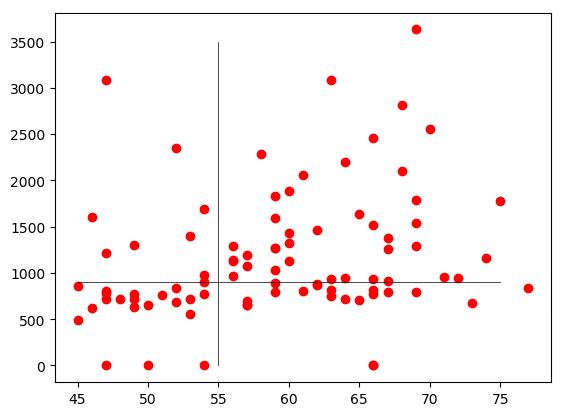

In [177]:
# companies_info.get('SUSTAINABILITY_SCORE')
sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_clean_info]
institution_holders = [company.get('INSTITUTION_HOLDERS_NO') for company in companies_clean_info]

# len(sustainability_scores)
# company[-1]

plt.plot(sustainability_scores, institution_holders, 'ro')

plt.plot([55, 55], [0, 3500], 'k-', lw=0.5)
plt.plot([45, 75], [900, 900], 'k-', lw=0.5)

# draw diagonal line from (70, 90) to (90, 200)
# plt.plot([55, 0], [90, 200], 'k-')

# pylab.plot(x,y,'o')

# # calc the trendline
# z = np.polyfit(sustainability_scores, institution_holders, 1)
# p = np.poly1d(z)
# plt.plot(sustainability_scores,p(x),"r--")
# # the line equation:
# # print "y=%.6fx+(%.6f)"%(z[0],z[1])

[7.74, 0.72, 0.09, 0.21, 6.0, 0.31, 0.29, 0.58, 0.38, 0.75, 2.17, 0.27, 0.21, 2.92, 0.42, 1.42, 0.47, 0.31, 0.28, 2.6, 0.16, 0.31, 0.15, 0.11, 16.24, 0.36, 41.5, 0.02, 0.27, 0.1, 0.17, 0.23, 0.31, 26.51, 1.65, 0.19, 0.42, 0.33, 0.39, 6.55, 1.11, 0.17, 1.13, 0.91, 0.23, 0.98, 0.07, 0.35, 0.35, 0.29, 29.52, 1.14, 0.88, 0.06, 0.16, 0.15, 0.71, 0.27, 0.51, 0.9, 0.08, 0.0, 0.09, 0.72, 0.26, None, 14.18, 0.39, 3.74, 0.1, 0.29, 0.58, 0.6, 0.27, 0.16, 0.18, 44.08, None, 0.42, 25.01, 1.58, 1.17, 27.02, 0.67, 0.47, 0.5, 17.21, 0.17, 0.96, 0.79, 6.95]


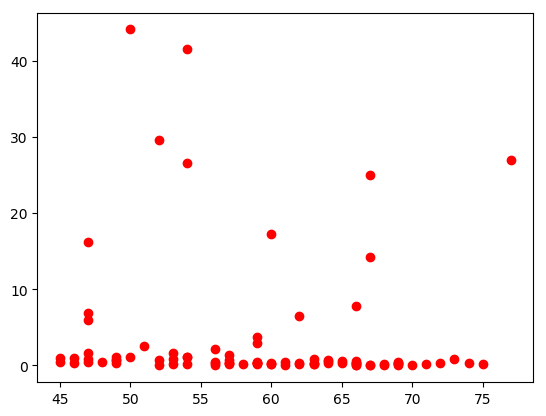

In [117]:
sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_clean_info]
insider_holders = [company.get('INSIDER_HOLDERS_PCT') for company in companies_clean_info]

print(insider_holders)
# len(sustainability_scores)
# company[-1]

plt.plot(sustainability_scores, insider_holders, 'ro')

In [92]:
# company_names = [company.get('COMPANY_NAME') for company in companies_info]
# sustainability_scores = [company.get('SUSTAINABILITY_SCORE') for company in companies_info]
# sic_division = [company.get('SIC_DIVISION') for company in companies_info]

# # print(company_names)
# print(sustainability_scores)
# print(sic_division)
# # len(sustainability_scores)
# # company[-1]

# data = [go.Bar(
#             x=sic_division,
#             y=sustainability_scores
#     )]
# py.iplot(data, filename='line')

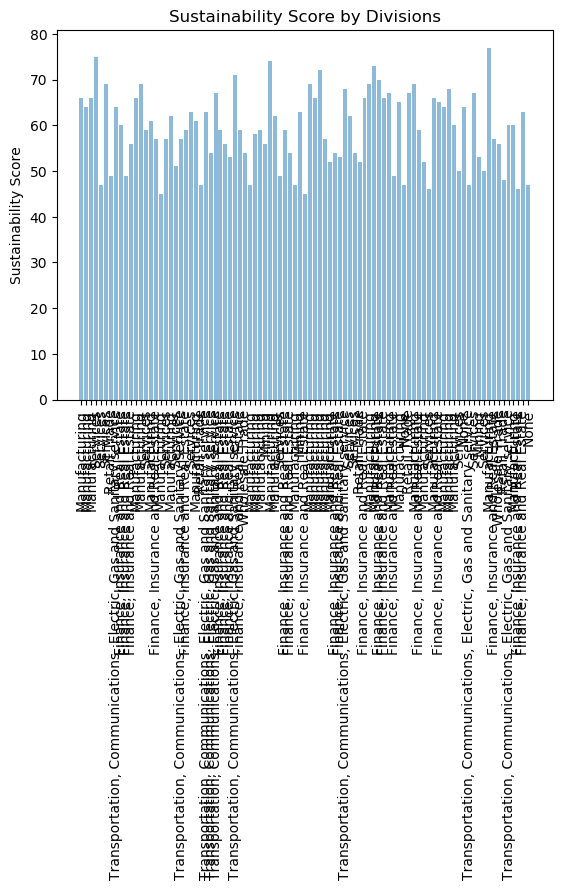

In [155]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = [company.get('SIC_DIVISION') for company in companies_clean_info]
y_pos = np.arange(len(objects))
performance = [company.get('SUSTAINABILITY_SCORE') for company in companies_clean_info]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=90)
plt.ylabel('Sustainability Score')
plt.title('Sustainability Score by Divisions')
 
plt.show()

In [157]:
df_company_clean_info = pd.DataFrame(companies_clean_info)
df_company_clean_info
df_company_clean_info['SUSTAINABILITY_SCORE'].mean()
df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean()

SIC_DIVISION
Finance, Insurance and Real Estate                                    57.130435
Manufacturing                                                         62.906250
Mining                                                                57.333333
Retail Trade                                                          52.600000
Services                                                              57.071429
Transportation, Communications, Electric, Gas and Sanitary service    61.222222
Wholesale Trade                                                       55.000000
Name: SUSTAINABILITY_SCORE, dtype: float64

7


Text(0.5,1,'Average Sustainability Score by Divisions')

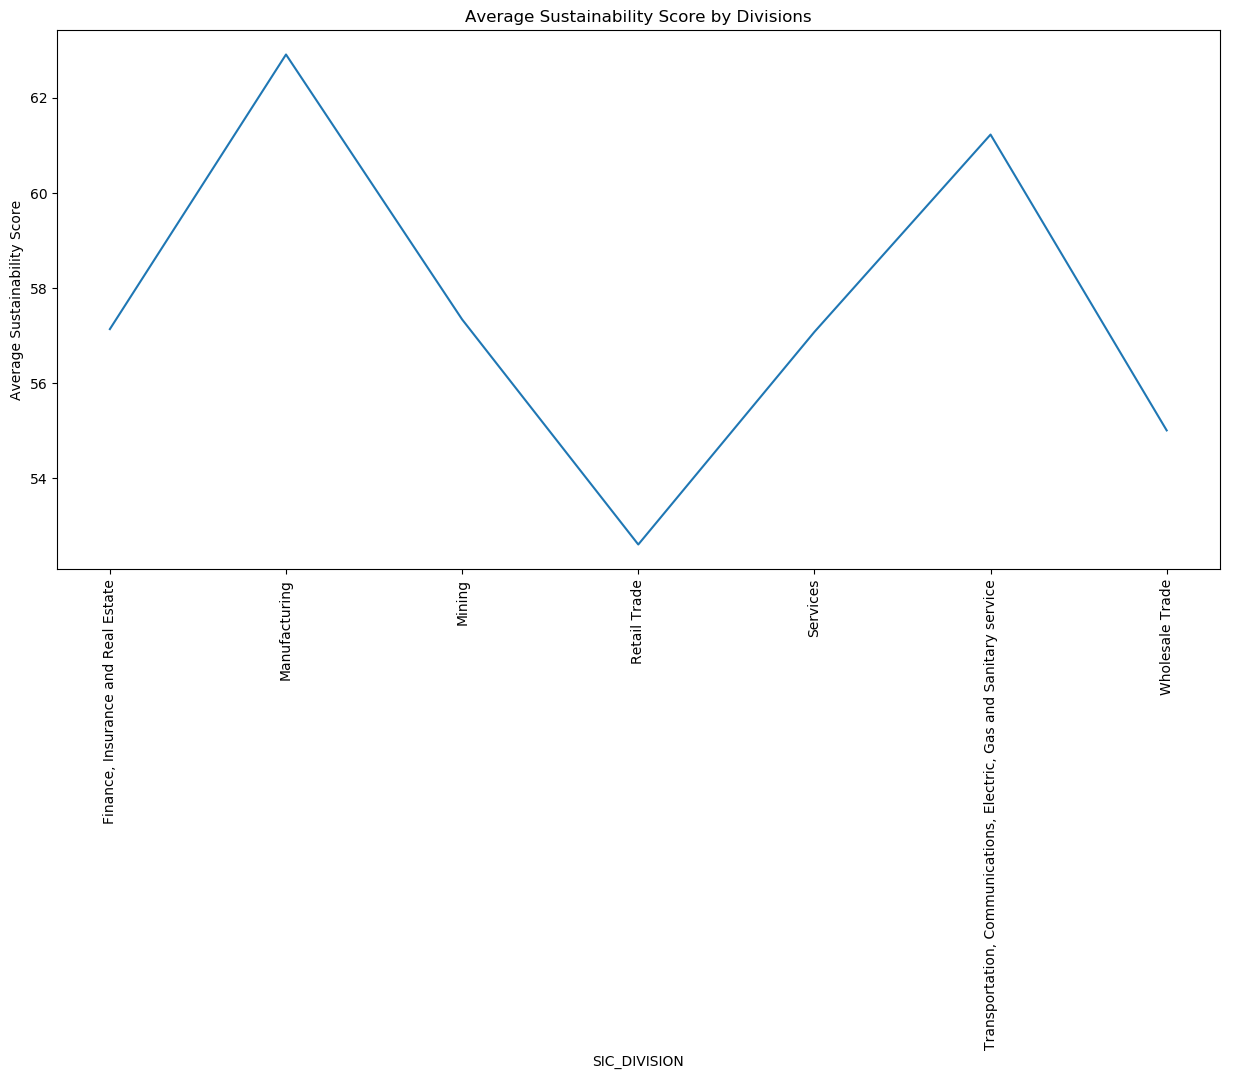

In [159]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean().plot(ax=ax)
print(len(df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean()))
plt.xticks(np.arange(len(df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean())),df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean().keys(), rotation=90)
plt.ylabel('Average Sustainability Score')
plt.title('Average Sustainability Score by Divisions')
# df_company_clean_info.groupby('SIC_DIVISION')['SUSTAINABILITY_SCORE'].mean().keys()

In [149]:
df_company_clean_info.plot.scatter(x='SIC_CODE',y='SUSTAINABILITY_SCORE')

ValueError: scatter requires x column to be numeric